# Lab 0: Olá Mundo Quântico!

# Índice

* [Bem-vindos à Escola de Verão Global Qiskit 2025!](#welcome)
    - [Visão geral do Lab 0](#overview)
    - [Instalar Qiskit](#install)
    - [Solução de problemas](#troubleshooting)
    - [Configurando token da API](#setting-ibm-cloud)
    - [Importações](#imports)
    - [Verificação de integridade](#sanity-check)
* [Gerar um estado GHZ de três qubits usando padrões Qiskit](#ghz) 
    - [Passo 1. Mapear](#map)
    - [Passo 2. Otimizar](#optimize)
    - [Passo 3. Executar](#execute)
    - [Passo 4. Pós-processar](#post-process)
* [Parabéns!](#congratulations)
    - [Desafio bônus: Executar GHZ em hardware](#bonus)

# Bem-vindos à Escola de Verão Global Qiskit 2025! <a id="welcome"></a>

Estamos emocionados em dar as boas-vindas a vocês para mais um ano da Escola de Verão Global Qiskit (QGSS). Este programa de verão de duas semanas combina palestras teóricas com exercícios práticos para expandir o conhecimento de computação quântica e programação quântica entre a comunidade de estudantes, pesquisadores e profissionais que usam Qiskit em sua jornada quântica diária.

O componente prático desta escola de verão consiste em uma série de notebooks Jupyter ("labs") projetados para guiá-los através de diferentes tópicos de interesse.

Cada lab complementa as palestras teóricas correspondentes e inclui links úteis para documentação, tutoriais e referências às palestras. Além disso, vocês também podem encontrar muitos recursos úteis no [IBM Quantum Learning](https://quantum.cloud.ibm.com/learning).

## Visão geral do Lab 0 <a id="overview"></a>

O objetivo principal deste lab introdutório é mostrar como usar os notebooks de desafio, avaliar suas soluções e verificar se seu computador está corretamente configurado para executar os códigos quânticos que vocês serão solicitados a completar.

Para completar os diferentes labs do QGSS, vocês precisam saber que cada notebook conterá algumas células predefinidas que não devem ser modificadas, e alguns blocos de código de desafio que vocês precisarão preencher com seu próprio código. Em particular, vocês precisarão escrever o código necessário abaixo de cada linha que tem o comentário `### ESCREVA SEU CÓDIGO ABAIXO AQUI ###`. Certifiquem-se de que toda vez que reiniciarem o kernel, executem todas as células em ordem, para que os notebooks de desafio sejam executados e avaliados corretamente. Isso garantirá que todo o código seja atualizado e tudo funcione perfeitamente. Pode haver algumas exceções, como células de instalação ou células onde vocês salvam suas credenciais de conta. Estas provavelmente precisarão ser executadas apenas uma vez.

O conteúdo deste lab foca no uso de padrões Qiskit para produzir um estado GHZ, enfatizando a importância de projetar circuitos quânticos otimizados. No final há um exercício bônus onde vocês podem executar seu código em um computador quântico real.

In [ ]:
from platform import python_version

print(python_version())

Se esse não for o caso, você pode atualizá-lo usando sua ferramenta preferida. Se não tiver certeza de como fazer isso, algumas opções recomendadas são:
- MacOS: [Homebrew](https://brew.sh/)
- Linux: `sudo apt-get update `Um guia detalhado sobre como atualizar o Python dependendo do seu sistema operacional está descrito aqui: [Como atualizar o Python](https://4geeks.com/how-to/how-to-update-python-version)<div class=\"alert alert-block alert-warning\">
- ⚠️ **Nota:** Você não pode executar o Lab 3 do QGSS usando Windows. Portanto, se você estiver usando Windows, recomendamos que use [um ambiente de laboratório online.](https://docs.quantum.ibm.com/guides/online-lab-environments)</div>\n\nPara mais informações, consulte o wiki: https://github.com/qiskit-community/qgss-2025/wiki/Jupyter-Notebook-Environment-(Local-and-Online)

Agora vamos instalar o grader que irá instalar o Qiskit 2.x e as bibliotecas necessárias que precisaremos para a escola de verão.

In [ ]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"

In [ ]:
import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

You should have Qiskit version `>=2.0.0` and Grader `>=0.22.9`. If you see a lower version, you need to restart your kernel and reinstall the grader.

## Solução de problemas <a id="troubleshooting"></a>
Se a célula anterior apresentou um erro, você pode optar por instalar o Qiskit em um ambiente virtual (dois métodos sugeridos a seguir). Se você não teve erros, pode ignorar esta célula e prosseguir para a próxima.
Aqui propomos dois métodos diferentes para configurar um ambiente virtual para instalar o Qiskit.
1. Usando [venv](https://docs.python.org/3/library/venv.html), conforme explicado no [guia de instalação do Qiskit](https://docs.quantum.ibm.com/guides/install-qiskit). 
2. Usando [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html), conforme explicado neste vídeo de [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4).

## Configure sua conta IBM Cloud <a id="setting-ibm-cloud"></a>

Você deve configurar uma conta IBM Cloud para acompanhar o progresso com o grader e executar circuitos quânticos em hardware real.


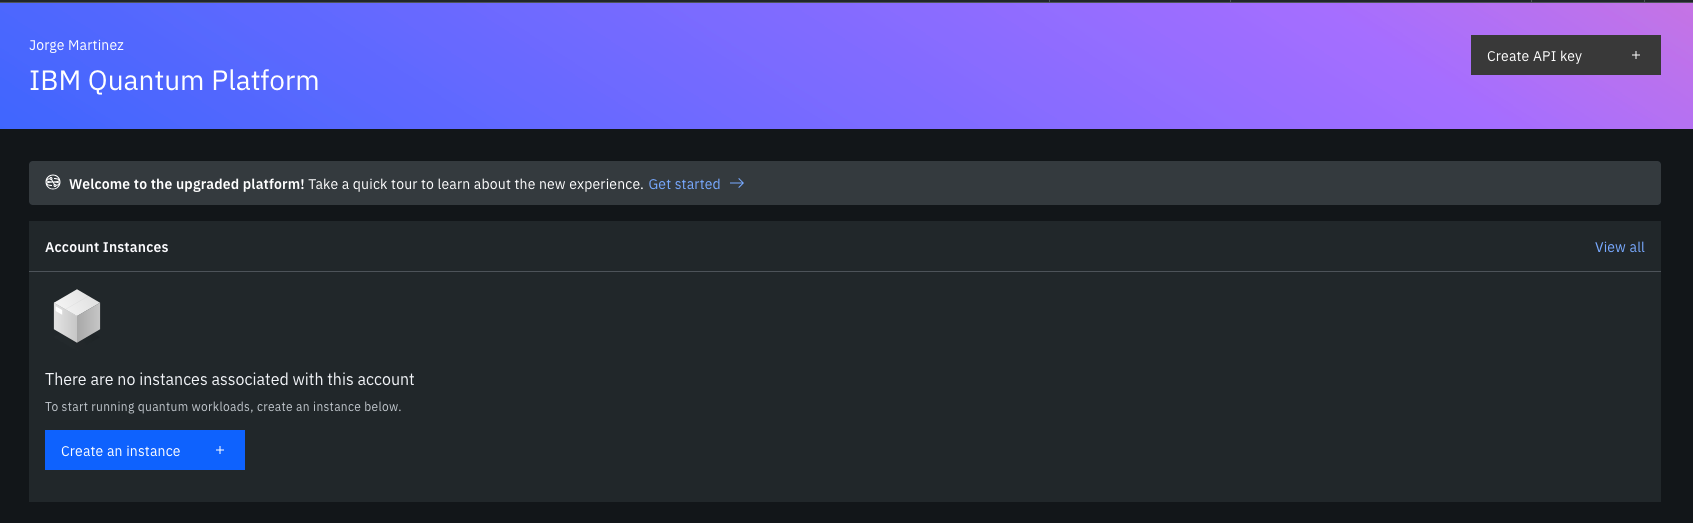




Configure sua conta da seguinte forma:

1. Vá para a [Plataforma IBM Quantum® atualizada](https://quantum.cloud.ibm.com/).
2. Vá para o canto superior direito (como mostrado na imagem acima), crie seu token de API e copie-o para um local seguro.
3. In the next cell, replace `deleteThisAndPasteYourAPIKeyHere` with your API key.
4. Vá para o canto inferior esquerdo (como mostrado na imagem acima) e **crie sua instância**. Certifique-se de escolher o plano aberto.
5. After the instance is created, copy its associated CRN code. You may need to refresh to see the instance.
6. Na célula abaixo, substitua `deleteThisAndPasteYourCRNHere` pelo seu código CRN.

Consulte [este guia](https://quantum.cloud.ibm.com/docs/guides/cloud-setup) para mais detalhes sobre como configurar sua conta IBM Cloud®.

<div class="alert alert-block alert-warning">
    
⚠️ **Note:** Treat your API key as you would a secure password. See the [Cloud setup](https://quantum.cloud.ibm.com/docs/guides/cloud-setup#cloud-save) guide for more information about using your API key in both secure and untrusted environments.
</div>

In [ ]:
# Salve sua chave API para acompanhar seu progresso e ter acesso aos computadores quânticos

your_api_key = "rqHNn40lAGhFvAvcgbkJ3xO0R37fxY1NmxNcC2lvZbtt"
your_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/9418f3a1469ab60e6a7b8c679c5dcf0b:2842dc64-4cb1-4fff-8b1f-326d1dd2e1ca::"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qgss-2025",
    overwrite=True
)

In [ ]:
# Import necessary libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

# Create a new circuit with three qubits
qc = QuantumCircuit(3)

### WRITE YOUR CODE BELOW HERE ###
# Add a H gate to qubit 0
qc.h(0)

# Add a CNOT gate to qubits 0 and 1
qc.cx(0, 1)

# Add a CNOT gate to qubits 1 and 2
qc.cx(1, 2)

### YOUR CODE FINISHES HERE    ###

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

## Imports <a id="imports"></a>


In [ ]:
### WRITE YOUR CODE BELOW HERE ###
# Write the coupling map of connections between qubits 0 and 1 and 0 and 2 as a list of pairs: [[0,1],...]
coupling_map = [[0, 1], [0, 2]]

# Transpile the quantum circuit `qc` using the `generate_preset_pass_manager` function and the `coupling_map` list
pm = generate_preset_pass_manager(coupling_map=coupling_map)

### YOUR CODE FINISHES HERE    ###
qc_transpiled = pm.run(qc)

qc_transpiled.draw("mpl")

## Verificação básica <a id="sanity-check"></a>
Vamos agora criar um circuito quântico muito simples para verificar se tudo está funcionando conforme esperado.

In [ ]:
# Criar um novo circuito com um único qubit
qc = QuantumCircuit(2)
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubit 1
qc.cx(0, 1)
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

The output you see represents a quantum circuit that produces a Bell state:

$$|Bell\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}}$$

# Gerar um estado GHZ de três qubits usando padrões Qiskit <a id="ghz"></a>

Agora, vamos seguir este episódio de [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4) para guiá-lo através do processo de gerar um estado GHZ de três qubits usando [padrões Qiskit](https://quantum.cloud.ibm.com/docs/en/guides/intro-to-patterns). 

Um padrão Qiskit é uma estrutura geral para decompor problemas específicos de domínio e contextualizar capacidades necessárias em estágios. Isso permite a composabilidade perfeita de novas capacidades desenvolvidas por pesquisadores da IBM Quantum (e outros) e possibilita um futuro no qual tarefas de computação quântica são realizadas por infraestrutura de computação heterogênea poderosa (CPU/GPU/QPU). 

As quatro etapas de um padrão Qiskit são as seguintes:\n\n1. **Mapear** problema para circuitos quânticos e operadores\n2. **Otimizar** para hardware de destino\n3. **Executar** no hardware de destino\n4. **Pós-processar** resultados


## Etapa 1. Mapear <a id="map"></a>

O estado Greenberger–Horne–Zeilinger (GHZ) é a extensão para três (ou mais) qubits do estado maximamente emaranhado característico do estado Bell descrito acima. Isso significa que o estado GHZ é:\n\n$$\n|GHZ\\rangle = \\frac{|000\\rangle+|111\\rangle}{\\sqrt{2}}.\n$$
Uma das características interessantes do estado GHZ é que existem maneiras diferentes e equivalentes de construí-lo usando um circuito quântico. No Exercício 1, você fará isso de uma das maneiras mais comuns.

<a id="Exercise_1"></a>
<div class="alert alert-block alert-success">
    
<b>Exercício 1: Projetar um estado GHZ</b>
 
Este é seu primeiro exercício da Escola de Verão! Empolgante, não é?

Neste exercício, você projetará um estado GHZ seguindo os passos abaixo:
1. Aplicar uma porta Hadamard ao qubit 0, colocando-o em superposição. 
2. Aplicar uma porta CNOT entre os qubits 0 e 1.
3. Aplicar uma porta CNOT entre os qubits 1 e 2.

</div>

In [ ]:
# Importar módulos necessários
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

# Create a new circuit with three qubits
qc = QuantumCircuit(3)

### WRITE YOUR CODE BELOW HERE ###
# Add a H gate to qubit 0
qc.h(0)

# Add a CX gate with qubit 0 as the control and qubit 1 as the target
qc.cx(0, 1)

# Add a CX gate with qubit 0 as the control and qubit 2 as the target
qc.cx(0, 2)

### WRITE YOUR CODE ABOVE HERE ###

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

In [ ]:
# Submit your answer using following code
grade_lab0_ex1(qc)

## Etapa 2. Otimizar <a id="optimize"></a>

Muito bem ao projetar o circuito!

Neste caso, o circuito é muito superficial, e não é possível simplificá-lo ainda mais ou reduzir o número necessário de portas que são necessárias para construir o estado GHZ. No entanto, há outros cenários em que otimizar o circuito é fundamental.

Pode haver situações em que você enfrenta restrições em como seu circuito quântico pode ser projetado. Por exemplo, ao executar circuitos em hardware quântico, você pode encontrar restrições de conectividade entre qubits. Isso significa que alguns qubits podem não estar fisicamente conectados, então você precisará pensar em uma maneira inteligente de implementar portas que produzam o estado quântico desejado. Felizmente para nós, é aqui que o gerenciador de passes do Qiskit vem ao resgate! Você pode fornecer o circuito desejado junto com as restrições do dispositivo ao gerenciador de passes e ele transpilará o circuito e cuidará da otimização para você.

Vamos considerar, para o estado GHZ, uma situação em que estamos limitados a interações apenas entre os qubits 0 e 1 e qubits 0 e 2, mas não entre os qubits 1 e 2. Podemos introduzir essas restrições ao gerenciador de passes usando a função `generate_preset_pass_manager`.

<a id="Exercise_2"></a>
<div class="alert alert-block alert-success">
    
<b>Exercício 2: Transpilar um estado GHZ</b> \n\nNeste segundo exercício, você é solicitado a transpilar o estado GHZ anterior com as restrições de conectividade mencionadas:

- Qubit 0 <---> Qubit 1
- Qubit 0 <---> Qubit 2
- ~~Qubit 1 <---> Qubit 2~~

</div>

In [ ]:
# Write the coupling map of connections between qubits 0 and 1 and 0 and 2 as a list of pairs: [[0,1],...]
coupling_map = [[0, 1], [0, 2]]

# Transpile the quantum circuit `qc` using the `generate_preset_pass_manager` function and the `coupling_map` list
pm = generate_preset_pass_manager(coupling_map=coupling_map)

qc_transpiled = pm.run(qc)

qc_transpiled.draw("mpl")

In [ ]:
# Submit your answer using following code
grade_lab0_ex2(qc_transpiled)

## Etapa 3. Executar <a id="execute"></a>

O próximo passo é empolgante - vamos executar o circuito quântico usando o Qiskit Runtime! 

Faremos isso usando as duas [primitivas Qiskit](https://quantum.cloud.ibm.com/docs/guides/primitives):
1. **Sampler** amostra o registrador de saída da execução de um ou mais circuitos quânticos. Sua saída são contagens em medições por disparo. 
2. **Estimator** calcula o valor de expectativa de um ou mais observáveis em relação aos estados gerados pelo circuito quântico. Sua saída consiste nos valores de expectativa junto com seus erros padrão.

Primeiro, executamos nosso circuito usando o Sampler, então salvamos os resultados como a variável `results_sampler`. 

In [ ]:
# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Get the results
results_sampler = job.result()

Agora, executamos nosso circuito usando a primitiva Estimator, então salvamos os resultados como a variável `results_estimator`.

In [ ]:
# Recriar o circuito GHZ correto de 3 qubits
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up Sampler
sampler = Sampler(mode=backend)

# Submit the circuit to the Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Obter resultados do Sampler
results_sampler = job.result()

# Também configurar Estimator para observáveis (sem medições)
qc_no_meas = QuantumCircuit(3)
qc_no_meas.h(0)
qc_no_meas.cx(0, 1)
qc_no_meas.cx(1, 2)

estimator = Estimator(mode=backend)

# Definir alguns observáveis
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Submeter o circuito ao Estimator
pub = (qc_no_meas, observables)
job_est = estimator.run(pubs=[pub])

# Obter resultados do Estimator
results_estimator = job_est.result()

A seguir está a etapa final dos padrões Qiskit, onde visualizaremos nossos resultados.

## Etapa 4. Pós-processar <a id="post-process"></a>

Finalmente, a última etapa dos padrões Qiskit é pós-processar as informações que coletamos da execução do circuito quântico.\n\nPrimeiro visualizamos os resultados do Sampler. Podemos visualizar as contagens com um gráfico de histograma e rapidamente ver como os dois possíveis estados quânticos são medidos com uma probabilidade de 50%.

In [ ]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Resultados : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Agora podemos visualizar os resultados do Estimator.

In [ ]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Valores de expectativa: {list(zip(observables_list, exp_values))}")

# Set up our plot
container = plt.bar(observables_list, exp_values, width=0.8)
# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

We see that the observables $ZZI$ and $III$ have an expectation value of 1, since $ZZI$ introduces two minus signs that cancel out, and $III$ acts as the identity, leaving the GHZ state unchanged. The rest of the observables have an expectation value of 0, since their $Z$ operators introduce an odd number of minus signs, or the $X$ operators flip a number of qubits that make the overlapping states orthogonal.

# Parabéns! <a id="congratulations"></a>

Você concluiu com sucesso o Lab 0 e agora está pronto para começar a Escola de Verão Quântica Global 2025!

Neste laboratório, você configurou com sucesso sua máquina para executar o Qiskit v2.x e salvou seu token IBM Cloud para acompanhar seu progresso durante a Escola de Verão e executar circuitos quânticos em hardware real. Você também aprendeu sobre padrões Qiskit implementando um exemplo específico do circuito GHZ e projetando um circuito quântico otimizado. Finalmente, você executou um circuito GHZ em um simulador quântico e observou como as medições do Sampler estão em boa concordância com as probabilidades teóricas de medir os estados $|000\rangle$ e $|111\rangle$ com 50% de probabilidade.

Você pode verificar seu progresso com os laboratórios usando a célula abaixo:

In [ ]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Como exercício bônus, seria interessante realizar o mesmo experimento em hardware real para ver como o ruído afeta os resultados, então comparar os resultados para mostrar que não teremos uma concordância perfeita entre as probabilidades teóricas e os resultados.\n\nVocê está pronto? Vamos mergulhar!

## Desafio bônus: Executar GHZ em hardware <a id="bonus"></a>

Para executar um circuito quântico em um computador quântico usando Qiskit, primeiro precisamos definir o backend quântico. Poderíamos selecionar manualmente um computador quântico específico que queremos usar dentre os disponíveis da IBM Quantum. No entanto, às vezes é mais conveniente selecionar a máquina que está menos ocupada no momento para garantir uma execução rápida. É aí que o método `least_busy` é útil.

In [ ]:
# Definir o serviço. Isso permite acessar QPUs da IBM.
service = QiskitRuntimeService(name="qgss-2025")

# Obter um backend
backend = service.least_busy(operational=True, simulator=False)
print(f"Estamos usando o computador quântico {backend.name}")

A próxima chamada ilustra como é fácil executar circuitos quânticos em hardware com `QiskitRuntimeService`. Uma vez que selecionamos o backend na célula acima, podemos simplesmente copiar e colar as mesmas linhas de código que escrevemos para o simulador Sampler, incluindo pós-processamento e visualização.

In [ ]:
### WRITE YOUR CODE BELOW HERE ###
# Step 1. Map
# You should have created a GHZ circuit earlier and assigned to the variable `qc`
# Create a fresh GHZ circuit for hardware execution
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure_all()

# Step 2. Optimize
pm = generate_preset_pass_manager(backend=backend)
qc_transpiled = pm.run(qc)

# Step 3. Execute
sampler = Sampler(mode=backend)
job = sampler.run([qc_transpiled])

# Step 4. Post-process
results = job.result()
counts_list = results[0].data.meas.get_counts()
### YOUR CODE FINISHES HERE    ###

import matplotlib.pyplot as plt

plt.bar(counts_list.keys(), counts_list.values())
plt.xlabel("Measured States")
plt.ylabel("Count")
plt.title("GHZ State Measurement on Real Quantum Hardware")
plt.show()

print(f"Measurement results: {counts_list}")

<div class="alert alert-block alert-warning"><b>Aviso: Tempo de fila e limite de 10 minutos</b>
Isso levará aproximadamente 10 segundos de tempo de cálculo no hardware real, no entanto, executar isso no hardware real pode levar a longos tempos de fila e demorará um pouco, e bloqueará o notebook jupyter enquanto isso. Observe que o plano aberto inclui apenas 10 minutos de tempo no hardware real, e como precisaremos desses minutos nos laboratórios posteriores, certifique-se de economizar a maior parte do seu tempo para esses laboratórios.</div>

In [ ]:
# Import necessary classes
from qiskit_ibm_runtime import SamplerV2

# Create a new sampler with the backend
sampler = SamplerV2(mode=backend)

In [ ]:
# Submit the job for execution on quantum hardware
job = sampler.run([qc_transpiled])

# Retrieve the results
results = job.result()
print(f"Resultados do hardware quântico: {results[0].data}")

Fantástico!

Você conseguiu executar um circuito em um computador quântico real, e os resultados são muito bons! Os estados mais repetidos são $|000\rangle$ e $|111\rangle$, e eles acumulam uma probabilidade um pouco abaixo de 50%. No entanto, neste caso observamos que, devido ao ruído do computador quântico, alguns estados quânticos são medidos, mesmo que a probabilidade teórica de medir seja 0. Isso é realmente esperado, e veremos nos próximos laboratórios como podemos tentar corrigir ou mitigar os erros que são introduzidos pela natureza ruidosa dos computadores quânticos.

# Informações adicionais
**Criado por:** Jorge Martínez de Lejarza
**Orientado por:** Marcel Pfaffhauser, Junye Huang
**Versão:** 1.0.0